In [1]:
import pandas as pd
from tqdm import tqdm
import gensim
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# os.chdir(r"D://Proposal_Defense//Simulations")
# from Utils.Script_utils import get_data_splits, first_LSTM_training, get_data_splits_old_algo
from joblib import Parallel, delayed
import sys
from scipy.stats import norm

In [2]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
# tf.config.set_visible_devices([], 'GPU')

from tqdm.notebook import tqdm
tf.random.set_seed(seed_value)
import multiprocessing
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)

No GPU found


In [3]:
import matplotlib.pyplot as plt

import pickle

In [4]:
model_cbow = gensim.models.word2vec.Word2Vec.load(r"word2vec_sg")

In [5]:
lr = 1e-3
# from sklearn.model_selection import train_test_split


## Read the data
data = pd.read_csv(r"doc2vec_dbow.csv")

## We only using xylan and pectin
to_keep = ["pectin", "xylan"]

data = data[data["high_level_substr"].isin(to_keep)]

data = data.reset_index(drop = True)

features = [seq.replace("|", ",").replace(",", " ") for seq in data["sig_gene_seq"].values]

features  = np.array(features)

features = features.reshape(-1,1)

In [6]:
# data["high_level_substr"].value_counts()

In [7]:
data.head()

,sig_gene_seq,high_level_substr,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,"null,null,HTH_DeoR,HTH_AraC|HTH_AraC,8.A.59,PL...",pectin,0.098224,-0.016721,0.340086,-0.103025,-0.108523,-0.186498,-0.142543,0.572389,...,0.169946,-0.143168,0.421863,0.088525,0.044629,0.218964,0.507033,-0.179407,-0.099657,0.128027
1,"CE10,1.B.35",pectin,-0.114699,0.105488,0.111531,-0.116430,-0.133199,0.259120,0.133353,0.196669,...,-0.042859,0.027520,0.208792,-0.271193,0.064108,0.049114,-0.236957,0.039852,0.002365,0.016162
2,"3.A.1,3.A.1,3.A.1,3.A.1,PL2_2",pectin,-0.278164,0.085645,0.272704,-0.028930,0.022241,0.520536,0.059369,0.058101,...,-0.059951,-0.108473,0.103364,-0.210818,0.063985,-0.065916,-0.171995,-0.132060,-0.036154,-0.029065
3,"MarR,null,null,AraC_binding,null,null,PfkB,nul...",pectin,-0.195133,-0.111228,0.434263,-0.097529,-0.028071,0.497665,0.207075,0.449561,...,0.175302,0.190835,0.102370,-0.651666,-0.101355,-0.007362,-0.107131,-0.218027,0.537375,0.115762
4,"PL10_1,CE8,PL11",pectin,-0.289301,0.035218,0.544027,0.116612,-0.201045,0.170767,-0.295381,0.142336,...,-0.043412,0.048884,0.392662,-0.174932,0.163090,0.252030,0.078837,-0.145878,0.054710,-0.264735


In [8]:
reps = 50

In [9]:
with open('true_data_doc2vec_lstm_var_0.0001.pkl', 'rb') as f:
    catch = pickle.load(f)  

In [10]:
def ann(hidden = 10): 
    input_layer = tf.keras.layers.Input(shape = (X_train_word2vec.shape[1]))
    hidden_layer = tf.keras.layers.Dense(hidden)
    hidden_output = hidden_layer(input_layer)
    pred_layer = tf.keras.layers.Dense(1)
    pred_output = pred_layer(hidden_output)
#     pred_output = tf.keras.layers.Activation("softmax")(pred_output)
    model = tf.keras.models.Model(input_layer, pred_output)
    return model

In [11]:
h1, h2 = 16,16

In [12]:
X_train_word2vec = data.iloc[:,-25:]

In [13]:


ann_15 = ann(h1)


# In[35]:


# ann_15.summary()


# In[36]:



In [14]:
ann_15.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense (Dense)               (None, 16)                416       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train_word2vec = data.iloc[:,-50:]

In [16]:
ann_20 = ann(h2)



# ann_20.summary()



In [17]:
total_weights_1 = ann_15.count_params()

In [18]:
total_weights_2 = ann_20.count_params()

In [19]:
total_weights = total_weights_1 + total_weights_2 + 1 

In [20]:
total_weights

1267

In [21]:
## batch size
batch_size = 32

In [22]:
# var_weights = 0.08
# var_targets = 0.08

In [23]:
from scipy.stats import multivariate_normal as mvn

In [24]:
from scipy.stats import invgamma, norm

In [25]:
from tqdm.notebook import tqdm

In [26]:
threshold = 5

In [27]:
import random

In [28]:
lr = 0.1

In [29]:
import numpy as np

In [30]:
weights_ann_1 = ann_15.get_weights()
weights_ann_2 = ann_20.get_weights()

In [31]:
def get_targets_with_weights(batch_data, batch_data1, initial_ensembles, log_sigma_points_1): 

    n_hidden_1 = len(weights_ann_1[0].ravel())

    hidden_weights_1 = initial_ensembles[:,:n_hidden_1].reshape( size_ens, batch_data.shape[1], h1)

    
    hidden_output_1 = np.einsum('ij,kjl->kil', batch_data, hidden_weights_1)

    
    hidden_layer_bias_1 = initial_ensembles[:,n_hidden_1:(n_hidden_1 + h1)].reshape(size_ens, 1,  h1)



    hidden_output_1 = hidden_output_1 + hidden_layer_bias_1

    n_pred_weights_1 = len(weights_ann_1[2].ravel())

    output_weights_1 = initial_ensembles[:,(n_hidden_1 + h1):(n_hidden_1 + h1 + n_pred_weights_1) ].reshape(size_ens, h1, 1)

    output_1 = np.einsum('ijk,ikl->ijl', hidden_output_1, output_weights_1)


    output_layer_bias_1 = initial_ensembles[:,(n_hidden_1 + h1 + n_pred_weights_1):(n_hidden_1 + h1 + n_pred_weights_1 + 1)].reshape(size_ens, 1, 1)



    final_output_1 = output_1 + output_layer_bias_1

    n_hidden_2 = len(weights_ann_2[0].ravel())

    initial_ensembles_1 = initial_ensembles.copy()[:, total_weights_1:(total_weights_1+ total_weights_2)]

    hidden_weights_2 = initial_ensembles_1[:,:n_hidden_2].reshape(size_ens, batch_data1.shape[1], h2)



    hidden_output_2 = np.einsum('ij,kjl->kil', batch_data1, hidden_weights_2)

    hidden_layer_bias_2 = initial_ensembles[:,n_hidden_2:(n_hidden_2 + h2)].reshape(size_ens, 1,  h2)

    hidden_output_2 = hidden_output_2+ hidden_layer_bias_2

    n_pred_weights_2 = len(weights_ann_2[2].ravel())

    output_weights_2 = initial_ensembles_1[:,(n_hidden_2 + h2):(n_hidden_2 + h2 + n_pred_weights_2) ].reshape(size_ens, h2, 1)


    output_2 = np.einsum('ijk,ikl->ijl', hidden_output_2, output_weights_2)


    output_layer_bias_2 = initial_ensembles_1[:,(n_hidden_2 + h2 + n_pred_weights_2):(n_hidden_2 + h2 + n_pred_weights_2 + 1)].reshape(size_ens, 1, 1)


    final_output_2 = output_2 + output_layer_bias_2


    weights_1 = initial_ensembles[:, :total_weights_1]

    weights_2 = initial_ensembles[:, total_weights_1:(total_weights_1 + total_weights_2)]


    avg_weights = initial_ensembles[:, -1].reshape(-1,1)

    avg_weights_sig = expit(avg_weights)
    
    avg_weights_sig = avg_weights_sig.reshape(avg_weights_sig.shape[0], 1, avg_weights_sig.shape[1])
    
    complement_weights_sig = 1 - expit(avg_weights)
    
    complement_weights_sig = complement_weights_sig.reshape(complement_weights_sig.shape[0], 1, complement_weights_sig.shape[1])

    final_output_1 = final_output_1*complement_weights_sig
    
    final_output_2 = final_output_2*avg_weights_sig
    
    output_1_ravel = final_output_1.reshape(size_ens, final_output_1.shape[1]*final_output_1.shape[2])

    output_2_ravel = final_output_2.reshape(size_ens, final_output_2.shape[1]*final_output_2.shape[2])


    output_1_ravel = output_1_ravel

    output_2_ravel = output_2_ravel



    weights_1_add = np.zeros((size_ens, (total_weights_2 - total_weights_1)))



    weights_1 = np.hstack((weights_1, weights_1_add))
    


    stack_1 = np.hstack((output_1_ravel, weights_1, np.repeat(0, size_ens).reshape(-1,1), np.repeat(0, size_ens).reshape(-1,1)))



    
    stack_2 = np.hstack((output_2_ravel, weights_2, avg_weights, log_sigma_points_1))

    
    initial_aug_state = np.hstack((stack_1, stack_2)) 
    

    return initial_aug_state , output_1_ravel, output_2_ravel, log_sigma_points_1



In [32]:
import time

In [33]:
from scipy.stats import multivariate_normal as mvn

In [34]:
var_weights =32
# var_weights_vec = 4
# var_targets = 0.04
# var_weights = 2

In [35]:
from scipy.stats import multivariate_normal as mvn

In [36]:
reduction = 8
# reduction = 10

In [37]:
shape_needed = (total_weights + 2*batch_size*1 + 1 + (total_weights_2 - total_weights_1))//reduction

In [38]:
size_ens = shape_needed

In [39]:
size_ens = int(size_ens)

In [40]:
size_ens

216

In [41]:
# train_fudged_probs

In [42]:
import matplotlib.pyplot as plt

In [43]:
from scipy.special import expit

In [44]:
# catch1[0][0]

In [45]:
# catch_train_logits_second[0]

In [46]:
from datetime import datetime

In [47]:
def expit(x):
    """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
    return 1 / (1 + np.exp(-x))

In [48]:
from scipy.stats import gamma

In [49]:
# second_lstm[0]

In [50]:
# reduction = 8
# var_weights = 1

In [51]:
# cur_idx = 16
# np.log(catch_test_probs[cur_idx]/(1-catch_test_probs[cur_idx]))

In [52]:
# catch_preds_df

In [53]:
# ids = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] < 0.5]
# ids_more = [i for i in range(0, catch_test_probs[cur_idx].shape[0]) if catch_test_probs[cur_idx][i] > 0.5]

In [54]:
# ids_more

In [55]:
import plotly.express as px

In [56]:
import seaborn as sns

In [57]:
use_cores = multiprocessing.cpu_count()-1

In [58]:
use_cores = 15

In [60]:
with open('first_lstm_with_doc2vec_lstm_var_0.0001_real_world_heavy_dropout.pkl', 'rb') as f:
    first_lstm = pickle.load(f)  

In [61]:
# threshold = 200
# cutoff_threshold = 70

In [62]:
catch1 = first_lstm

In [63]:
# catch1[0]

In [64]:
from datetime import datetime

In [65]:
def rep_one_real_world(idx, inflation_factor = 0.2, cutoff = 100): 
    catch_1 = []
    catch_2 = []
    catch_3 = []
    catch_4 = []
    catch_5 = []
#     from scipy.special import expit
    patience_smaller = 0
# patience_bigger = 0

#     best_train_acc = 0
#     best_valid_acc = 1000

#     best_valid_mae = 10
    
    best_train_mae = 100
    
    X_train_logits = np.vstack((catch1[idx][0], catch1[idx][1]))
#     X_train_logits = catch_train_logits_second[idx]
    
    
    X_test_logits = catch1[idx][2]
    
    ## create training batch chunks
    train_idx = list(range(0, X_train_logits.shape[0]))
    batch_chunks = [train_idx[i:i+batch_size] for i in range(0,len(train_idx),batch_size)]

    ## generate some augmented variable for iteration 0
    initial_aug_state_mean = np.repeat(0, total_weights)
    initial_aug_state_mean = initial_aug_state_mean.reshape(-1,1)

    initial_aug_state_cov = var_weights*np.identity((total_weights))
    initial_ensembles = mvn(initial_aug_state_mean.reshape(initial_aug_state_mean.shape[0],), initial_aug_state_cov).rvs(size = size_ens)

    
    log_sigma_points_1 = (np.log(gamma(100, scale = 1/100).rvs(size_ens))).reshape(size_ens, 1)
    

#     y_train = catch_train_labels_second[idx]

#     y_valid = catch_valid_labels_second[idx]

#     y_test = catch_test_labels_second[idx]
    
    
    train_lstm = catch1[idx][3].numpy()
    valid_lstm = catch1[idx][4].numpy()
    # valid_word2vec = catch[idx][7].iloc[catch_valid_idxes[idx],:].reset_index(drop = True)
    test_lstm = catch1[idx][5].numpy()
 

    train_doc2vec = catch[idx][6].values
    valid_doc2vec = catch[idx][7].values
    # valid_word2vec = catch[idx][7].iloc[catch_valid_idxes[idx],:].reset_index(drop = True)
    test_doc2vec = catch[idx][8].values
    
    
    
    # train_valid_test_lstm = np.vstack((train_lstm, valid_lstm, test_lstm))
    # train_valid_test_doc2vec = np.vstack((train_doc2vec, valid_doc2vec, test_doc2vec))
    
    # train_valid_test_lstm = np.vstack((train_lstm, valid_lstm))
    # train_valid_test_doc2vec = np.vstack((train_doc2vec, valid_doc2vec))    
    
    train_valid_lstm = np.vstack((train_lstm, valid_lstm))
    train_valid_doc2vec = np.vstack((train_doc2vec, valid_doc2vec))    

    # best_width_train = 100
    
    # threshold_achieved = False
    # satisfactory = False
    # satisfactory_counter = 0
    
    
    best_coverage_train = 0
    
    start = datetime.now()
    
    for iter1 in range(0,500):

        for batch_idx in batch_chunks:

            batch_data = train_valid_lstm[batch_idx,:]
            batch_data1 = train_valid_doc2vec[batch_idx,:]
            # print(batch_data.shape)
            batch_targets = X_train_logits[batch_idx,:]
            # batch_targets = batch_targets.ravel().reshape(-1,1)

            column_mod_2_shape = total_weights_2 + batch_data.shape[0]*1 + 1 + 1
        
            H_t = np.hstack((np.identity(batch_targets.shape[0]), np.zeros((batch_targets.shape[0], column_mod_2_shape-batch_targets.shape[0]))))

            current_aug_state, column_mod_1, column_mod_2, log_sigma_points_1 = get_targets_with_weights(batch_data, batch_data1, initial_ensembles, log_sigma_points_1)
            
            var_targets_vec = np.log(1 + np.exp(log_sigma_points_1))
            
            var_targets_vec = var_targets_vec
            
            # current_aug_state_var = np.cov(current_aug_state.T) + inflation_factor*np.identity(current_aug_state.shape[1])
            
            current_aug_state_var = np.cov(current_aug_state.T) 
            
            G_t = np.array([1 , 1]).reshape(-1,1)
            
            scirpt_H_t = np.kron(G_t.T, H_t)
            
            temp1 = current_aug_state_var@scirpt_H_t.T
            
            temp2 = scirpt_H_t@current_aug_state_var@scirpt_H_t.T
        
            for ensemble_idx in range(0, current_aug_state.shape[0]):
                
                var_targets1 = var_targets_vec[ensemble_idx,:]
                
                R_t = var_targets1*np.identity(batch_targets.shape[0])
            
                measurement_error = mvn(np.repeat(0,batch_targets.shape[0]), var_targets1*np.identity(batch_targets.shape[0])).rvs(1).reshape(-1,1)
            
                target_current = batch_targets + measurement_error
                
                K_t = temp1@np.linalg.inv(temp2 + R_t)

                current_aug_state[ensemble_idx,:] = current_aug_state[ensemble_idx,:] +(K_t@(target_current -scirpt_H_t@current_aug_state[ensemble_idx,:].reshape(-1,1))).reshape(current_aug_state.shape[1],)
        

            weights_ann_1 = current_aug_state[:,batch_targets.shape[0]:(batch_targets.shape[0] + total_weights_1)]      

            weights_ann_2 = current_aug_state[:,-(total_weights_2+1):-2]    

            initial_ensembles = np.hstack((weights_ann_1, weights_ann_2, current_aug_state[:,-2].reshape(-1,1)))
            
            log_sigma_points_1 = current_aug_state[:,-1].reshape(-1,1)
               
            avg_betas = expit(current_aug_state[:,-2])
        
            complement = 1-avg_betas

            
            
            
            
            current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(train_valid_lstm, train_valid_doc2vec, initial_ensembles, log_sigma_points_1)
            
            initial_targets = column_mod_11 + column_mod_21
            
            
            initial_targets = initial_targets.reshape(size_ens, train_valid_lstm.shape[0],1)
            
            initial_targets_train = initial_targets
            
            
            
            
#             ind = (X_train_logits_true >= np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[0,:,:]) & (X_train_logits_true <= np.percentile(initial_targets_train, axis = 0, q = (2.5, 97.5))[1,:,:])
        
            initial_targets_softmax = expit(initial_targets)
        
            initial_softmax_train = initial_targets_softmax
            
            initial_targets_train_mean = initial_targets_softmax.mean(0)
            
            li = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]
            
            ui = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:]
            
            width = ui - li
            
            avg_width_train = np.mean(width)
            
            # interim = np.vstack((catch_train_probs[idx] , catch_valid_probs[idx] ))
        
            interim = expit(X_train_logits)
            
            ind = (interim >= li) & (interim <= ui)
            
            coverage_train= np.mean(ind.ravel())  
            
            train_mae = np.mean(np.abs(interim.ravel() - initial_targets_train_mean.ravel()))
        
            current_aug_state1, column_mod_11, column_mod_21, log_sigma_points_1 = get_targets_with_weights(test_lstm, test_doc2vec, initial_ensembles, log_sigma_points_1)
            
            initial_targets = column_mod_11 + column_mod_21
            
            initial_targets = initial_targets.reshape(size_ens, test_lstm.shape[0],1)
            
            initial_targets_test = initial_targets
            
            initial_targets_softmax = expit(initial_targets)    
            
            initial_targets_test_mean = initial_targets_softmax.mean(0)
            
            li = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[0,:,:]
            
            ui = np.percentile(initial_targets_softmax, axis = 0, q = (2.5, 97.5))[1,:,:]
            
            width = ui - li
            
            avg_width = np.mean(width)
            
            catch_test_probs = expit(X_test_logits)
            
            ind_test = (catch_test_probs >= li) & (catch_test_probs <= ui)
               

                        
            coverage_test = np.mean(ind_test.ravel())    

            # initial_targets_test_mean = initial_targets_train.mean(0)
    
            
            
            test_mae = np.mean(np.abs(catch_test_probs.ravel() - initial_targets_test_mean.ravel()))
       
        # print(avg_width_train, best_train_width, coverage_train)
        
#         print("epoch "+ str(iter1))
#         print("patience "+ str(patience_smaller))
#         print("train mae is " + str(train_mae))
#         print("test mae is " + str(test_mae))
        
#         print("train coverage is "+ str(coverage_train))
#         print("train width is " + str(avg_width_train))        
#         print("test coverage is "+ str(coverage_test))
#         print("test width is " + str(avg_width))
        # print("lstm weight is " + str(np.mean(complement)))
        # print("threshold " + str(threshold_achieved))
              
    
        if (train_mae < best_train_mae) : 
#             cur_best_train_width = avg_width_train
#             cur_best_test_width = avg_width

#             cur_best_train_coverage = coverage_train
#             cur_best_test_coverage = coverage_test 
#             cur_best_lstm_weight = np.mean(complement)
            best_train_mae = train_mae
            best_test_mae = test_mae
            exit_iter_no_thresh = iter1
            best_test_preds = initial_targets_test_mean
            patience_smaller = 0
            best_train_coverage = coverage_train
            best_test_coverage = coverage_test
            best_train_width = avg_width_train
            best_test_width = avg_width
            # satisfactory = True
            
        else:
            patience_smaller+=1
            
        if patience_smaller > threshold:
            
            break
            
        if (patience_smaller > cutoff_threshold) & (train_mae < 0.05):
            
            break
            
            
    print(best_test_mae,best_test_coverage, best_test_width, flush = True)
    end = datetime.now()
    total = (end- start)
    time_taken = total.seconds/60.0
    return best_train_mae, best_test_mae, best_train_coverage, best_train_width, best_test_coverage, best_test_width,  exit_iter_no_thresh, time_taken, best_test_preds
        
    # print("something went awry", flush = True)

In [66]:
threshold = 200

In [67]:
cutoff_threshold = 100

In [68]:
# rep_one_real_world(30)

In [69]:
catch_coverages = Parallel(n_jobs=use_cores, verbose = 10, backend = "loky")(delayed(rep_one_real_world)(i) for i in range(reps))

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp

0.3907552487389745 1.0 1.0


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.010508365011470917 1.0 0.06341752011435299


[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:  2.6min
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.0020467943089813962 1.0 0.02723696724472708


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.005458357651093676 1.0 0.052250815726606545
0.0043153902502751805 1.0 0.036815844558002006


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.009276056033447475 1.0 0.11241865519108613


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.004981395547582238 1.0 0.029581843370257717


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.00882421672263105 1.0 0.045401453904408216


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.022742644623045517 1.0 0.1427477340517358


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.0059517979618489945 1.0 0.03707855890329835
0.0008887284675677203 0.875 0.005349354022465488


[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:  5.2min


0.0006908910154011466 0.875 0.003588773502088002


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.011045756512582936 0.75 0.02701443981912207
0.0036104508246674934 1.0 0.027376124518328698


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.005938888823344533 1.0 0.02873946390743639
0.0032642060806156586 1.0 0.018600206515336247


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.016124077956482963 1.0 0.1256593051434779


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.013202722068442758 1.0 0.10513679523418913


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.012476953538350696 1.0 0.08294377413553855


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.01326546173750664 0.875 0.07826722000024428


[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:  6.3min
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.03732698586307009 0.625 0.08622237154822468


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.01594693140194046 1.0 0.1258666608059792


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.015471469017260427 1.0 0.10839205545271491
0.012098761884608303 1.0 0.07258270455004545


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.2581029893561322 1.0 1.0


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.011507967963180097 1.0 0.04808515882728905


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.0216649780950664 1.0 0.1177382478230509


[Parallel(n_jobs=15)]: Done  27 out of  50 | elapsed:  8.4min remaining:  7.2min


0.005011114765437462 0.875 0.02541240882164964


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.017315321057763518 0.875 0.0665499466562162


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.016258294291170025 1.0 0.09157981281653924


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.0166425306826851 0.875 0.07410936472700902


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.00912353950442053 1.0 0.05849148578870564


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.015356153956707898 1.0 0.19237251619919754


[Parallel(n_jobs=15)]: Done  33 out of  50 | elapsed: 10.0min remaining:  5.1min
/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.009913882923834239 0.75 0.026652883799151126


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.007169738723969463 0.875 0.021308500839282922


/tmp/ipykernel_1876129/2467791455.py:4: RuntimeWarning: overflow encountered in exp


0.015387766792865812 0.125 0.019648874399217288
0.02994280250551876 1.0 0.14717006462456889
0.01935415015841536 1.0 0.2717050239039631
0.00832770451042952 0.875 0.024189524038571268


[Parallel(n_jobs=15)]: Done  39 out of  50 | elapsed: 10.7min remaining:  3.0min


0.014860490771994445 1.0 0.1801515891859157
0.011827386638838039 1.0 0.07515420277937797
0.028297935656061146 1.0 0.13618399162383385
0.018092021032292786 1.0 0.1841460321672299
0.006572290786486506 1.0 0.03604542164649234
0.017717766256085885 1.0 0.0888733306402095


[Parallel(n_jobs=15)]: Done  45 out of  50 | elapsed: 11.8min remaining:  1.3min


0.016787141076944997 0.625 0.03462490971617367
0.016067622440432673 1.0 0.20069136013522446
0.011060808428808494 1.0 0.11592267372065715
0.01174394656727756 1.0 0.231485402951651
0.00764588810500577 1.0 0.049175141072292414


[Parallel(n_jobs=15)]: Done  50 out of  50 | elapsed: 13.9min finished


In [70]:
# catch_coverages

In [71]:
check = pd.DataFrame(catch_coverages).iloc[:,:-1]

In [72]:
# check

In [73]:
# check

In [74]:
# check.columns = ["train_mae", "test_mae", "avg_ci_width_train", "avg_ci_width_test", "avg_lstm_weight", "exit_iter", "exit_status"]

In [75]:
check

,0,1,2,3,4,5,6,7
0,0.002952,0.003610,0.969697,0.022360,1.000,0.027376,483,5.116667
1,0.003762,0.009276,1.000000,0.095510,1.000,0.112419,208,3.166667
2,0.000470,0.000691,0.969697,0.003066,0.875,0.003589,461,5.100000
3,0.004639,0.010508,1.000000,0.054783,1.000,0.063418,140,2.466667
4,0.402746,0.390755,1.000000,1.000000,1.000,1.000000,6,2.116667
5,0.004997,0.008824,1.000000,0.041070,1.000,0.045401,221,3.283333
6,0.003195,0.004981,1.000000,0.029322,1.000,0.029582,214,3.200000
7,0.004487,0.005458,0.984848,0.043015,1.000,0.052251,180,2.850000
8,0.002690,0.005952,1.000000,0.029092,1.000,0.037079,492,5.083333
9,0.001548,0.002047,1.000000,0.027089,1.000,0.027237,157,2.616667


In [76]:
check.columns = ["train_mae", "test_mae", "train_coverage", "train_width", "test_coverage", "test_width", "exit_iter", "time_taken"]

In [77]:
check.mean()

train_mae           0.020514
test_mae            0.024959
train_coverage      0.973333
train_width         0.107313
test_coverage       0.937500
test_width          0.119203
exit_iter         255.180000
time_taken          3.419000
dtype: float64

In [78]:
check_mean = check.mean().reset_index()

In [79]:
check_mean.to_csv("Real_World_mean_metrics_EnKF_LSTM_Doc2Vec_" + "var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens) +  ".csv", index = False)

In [80]:
check.std()

train_mae           0.070253
test_mae            0.063610
train_coverage      0.063885
train_width         0.192669
test_coverage       0.149936
test_width          0.191790
exit_iter         147.470051
time_taken          1.129827
dtype: float64

In [81]:
check_std = check.std().reset_index()

In [82]:
check_std.to_csv("Real_World_std_dev_metrics_EnKF_LSTM_Doc2Vec_" + "var_weights_" + str(var_weights) + "_num_ens_" + str(size_ens)+  ".csv", index = False)

In [83]:
check.std()/reps

train_mae         0.001405
test_mae          0.001272
train_coverage    0.001278
train_width       0.003853
test_coverage     0.002999
test_width        0.003836
exit_iter         2.949401
time_taken        0.022597
dtype: float64

In [84]:
true_preds = []
enkf_preds = []
for i in range(0,reps):
    all_preds = catch_coverages[i][-1]
    # all_preds = all_preds.mean(0)
    catch_test_probs = expit(catch1[i][2])
    true_probs = catch_test_probs.ravel().tolist()
    true_preds.append(true_probs)
    enkf_preds.append(all_preds.ravel().tolist())
    # plt.scatter(true_probs, all_preds.ravel().tolist())
    # plt.show()

In [85]:
true_preds = [inner for item in true_preds for inner in item]

In [86]:
enkf_preds = [inner for item in enkf_preds for inner in item]

In [87]:
np.mean(np.abs(np.array(true_preds)-np.array(enkf_preds)))

0.02495929570178035

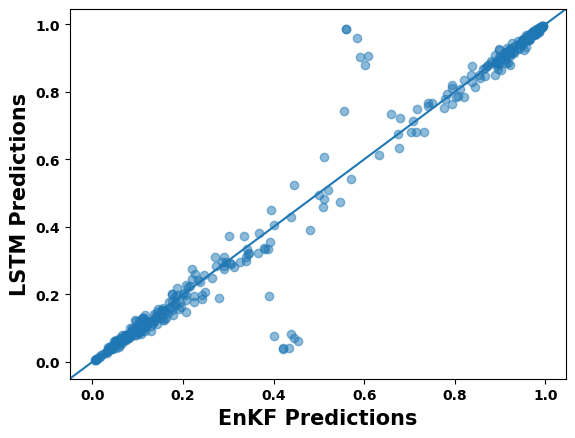

In [88]:
plt.scatter(enkf_preds,true_preds, alpha=0.5)
plt.xlabel("EnKF Predictions", fontsize = 15, fontweight = "bold")
plt.ylabel("LSTM Predictions", fontsize = 15, fontweight = "bold")
plt.xticks( fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
plt.axline((0, 0), slope=1)
plt.show()

In [89]:
# check